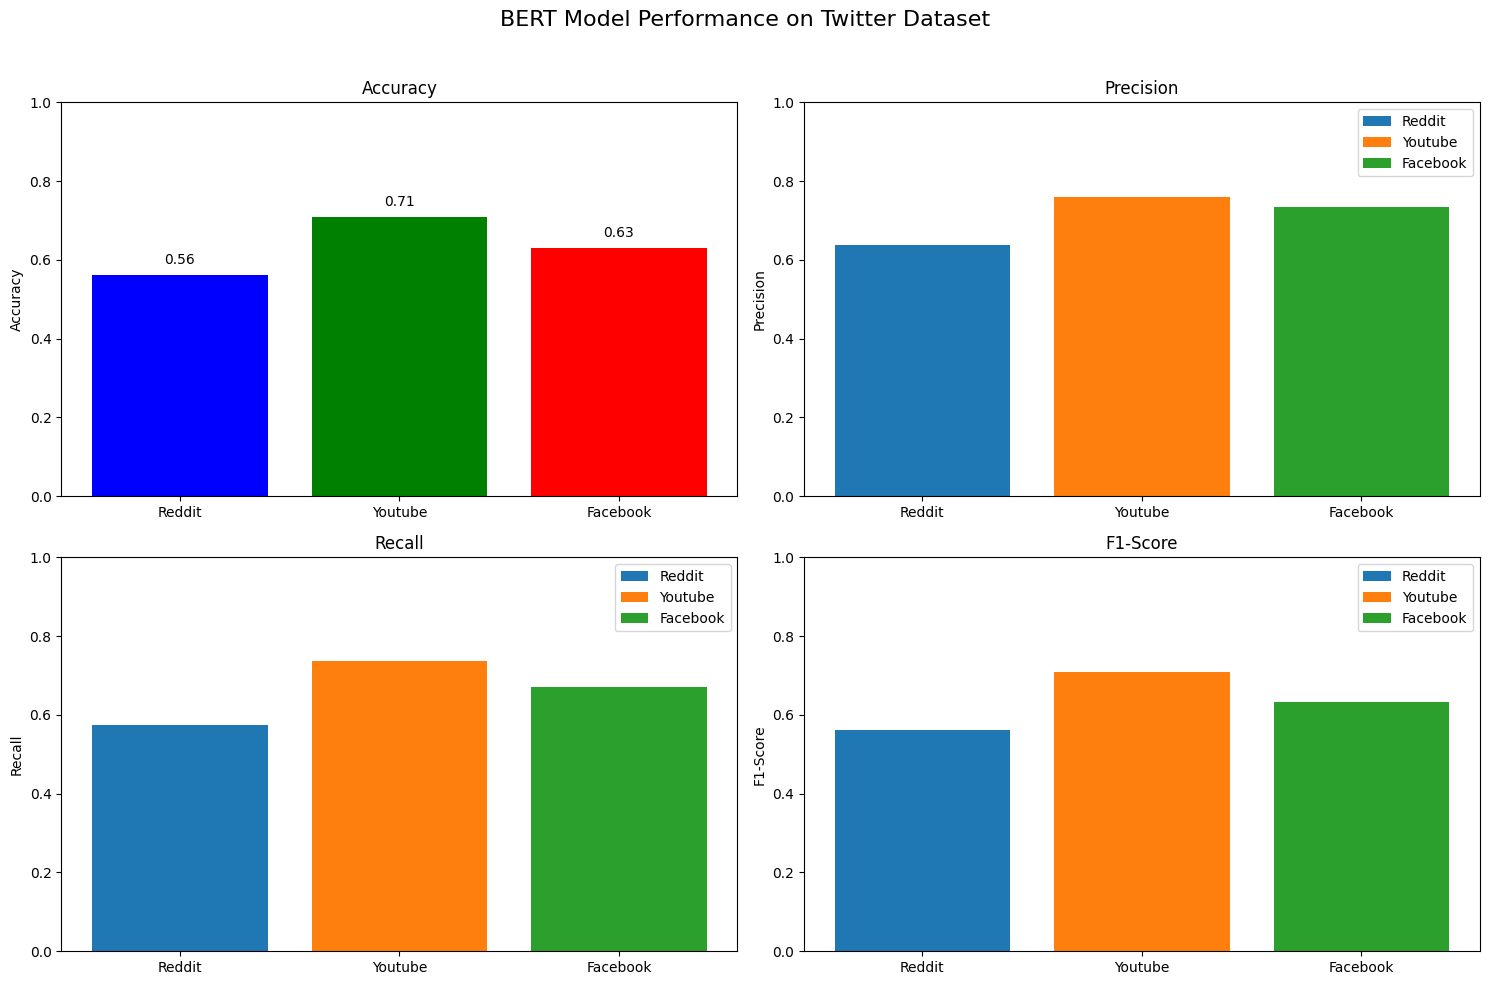

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the uploaded CSV file
file_path = 'bert_results_twitter.csv'
bert_results_youtube_df = pd.read_csv(file_path)

# Display the DataFrame to understand its structure
bert_results_youtube_df.head()

# Extract accuracy, precision, recall, and f1-score from the DataFrame
def extract_metrics(df):
    platforms = ['Reddit', 'Youtube', 'Facebook']
    metrics = ['precision', 'recall', 'f1-score']

    data = {metric: {platform: [] for platform in platforms} for metric in metrics}
    data['accuracy'] = {platform: None for platform in platforms}

    for platform in platforms:
        for i, row in df.iterrows():
            if i == 2:
                data['accuracy'][platform] = float(row[platform])
            elif i in [0, 1]:
                continue
            else:
                metric_name = row['Unnamed: 0']
                for metric in metrics:
                    data[metric][platform].append(eval(row[platform])[metric])

    return data

metrics_data = extract_metrics(bert_results_youtube_df)

# Plotting the extracted metrics
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('BERT Model Performance on Twitter Dataset', fontsize=16)

# Accuracy Plot
axs[0, 0].bar(metrics_data['accuracy'].keys(), metrics_data['accuracy'].values(), color=['blue', 'green', 'red'])
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylabel('Accuracy')
axs[0, 0].set_ylim([0, 1])
for i, (platform, accuracy) in enumerate(metrics_data['accuracy'].items()):
    axs[0, 0].text(i, accuracy + 0.02, f'{accuracy:.2f}', ha='center', va='bottom')

# Precision Plot
for platform in metrics_data['precision']:
    avg_precision = sum(metrics_data['precision'][platform]) / len(metrics_data['precision'][platform])
    axs[0, 1].bar(platform, avg_precision, label=platform)
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_ylim([0, 1])
axs[0, 1].legend()

# Recall Plot
for platform in metrics_data['recall']:
    avg_recall = sum(metrics_data['recall'][platform]) / len(metrics_data['recall'][platform])
    axs[1, 0].bar(platform, avg_recall, label=platform)
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylabel('Recall')
axs[1, 0].set_ylim([0, 1])
axs[1, 0].legend()

# F1-Score Plot
for platform in metrics_data['f1-score']:
    avg_f1_score = sum(metrics_data['f1-score'][platform]) / len(metrics_data['f1-score'][platform])
    axs[1, 1].bar(platform, avg_f1_score, label=platform)
axs[1, 1].set_title('F1-Score')
axs[1, 1].set_ylabel('F1-Score')
axs[1, 1].set_ylim([0, 1])
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
